## Predicting heart disease using machine learning

Statement: Given Clinical parameters about a patient, can we predict whether or not they have heart disease?

In [1]:
# Import core libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Below are the features we'll utilize to predict our target variable (presence or absence of heart disease):

* `Age`: The patient's age in years.
* `Sex`: The patient's sex (`1 = male, 0 = female`).
* Chest Pain Type (`cp`): ( 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)
* Resting Blood Pressure (`trestbps`): Resting blood pressure (in mm Hg).
* Cholesterol (`chol`): Serum cholesterol level (in mg/dL).
* Fasting Blood Sugar (`fbs`): (1: Fasting blood sugar > 120 mg/dL, 0: Fasting blood sugar ≤ 120 mg/dL)
* Resting Electrocardiographic Results (`restecg`): 0: (`Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)`
* Maximum Heart Rate Achieved (`thalach`): Maximum heart rate achieved during exercise.
* Exercise-Induced Angina (`exang`): (`1: Yes, 0: No`)
* ST Depression Induced by Exercise Relative to Rest (`oldpeak`): ST depression induced by exercise relative to rest.
* Slope of the Peak Exercise ST Segment (`slope`): (`0: Upsloping, 1: Flat, 2: Downsloping`)
* Number of Major Vessels Colored by Fluoroscopy (`ca`): Number of major vessels (0-3) colored by fluoroscopy.
* Thalassemia (`thal`): 3: (`Normal, 6: Fixed defect, 7: Reversible defect`)
* `target` - have disease or not (`1=yes, 0=no`)

In [3]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std   

target
1    165
0    138
Name: count, dtype: int64


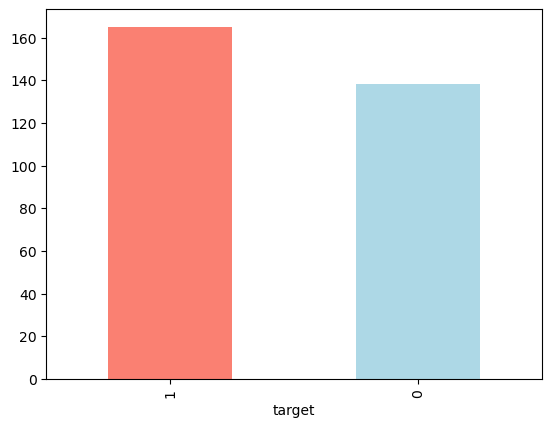

In [4]:
print(df["target"].value_counts())
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()

# compare target column with sex column

In [5]:
print(df["sex"].value_counts())
pd.crosstab(df["target"], df["sex"])

sex
1    207
0     96
Name: count, dtype: int64


sex,0,1
target,,
0,24,114
1,72,93


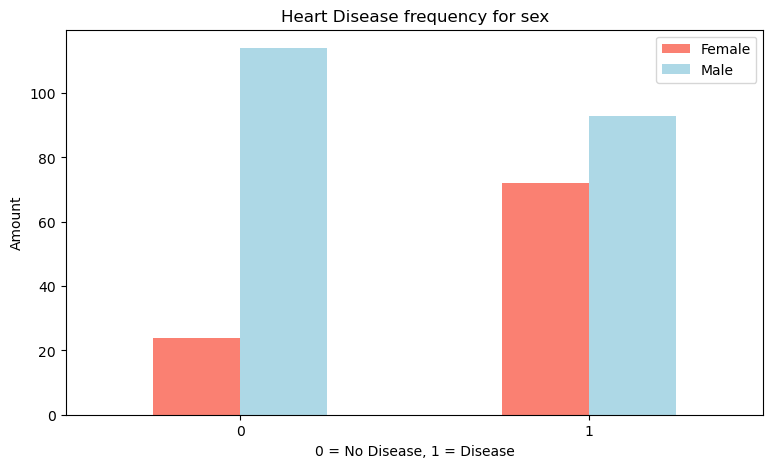

In [6]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(9,5), color=["salmon", "lightblue"])
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

# compare target column with Fasting Blood Sugar (fbs)

In [7]:
print(df["fbs"].value_counts())
pd.crosstab(df["target"], df["fbs"])

fbs
0    258
1     45
Name: count, dtype: int64


fbs,0,1
target,,
0,116,22
1,142,23


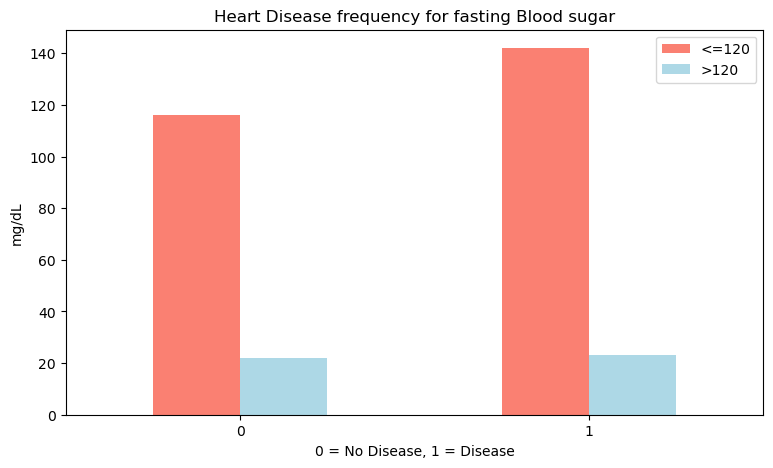

In [8]:
pd.crosstab(df["target"], df["fbs"]).plot(kind="bar", figsize=(9,5), color=["salmon", "lightblue"])
plt.title("Heart Disease frequency for fasting Blood sugar")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("mg/dL")
plt.legend(["<=120", ">120"])
plt.xticks(rotation=0)
plt.show()

# Resting Blood Pressure (trestbps) vs age

In [9]:
df["trestbps"].value_counts()

trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64

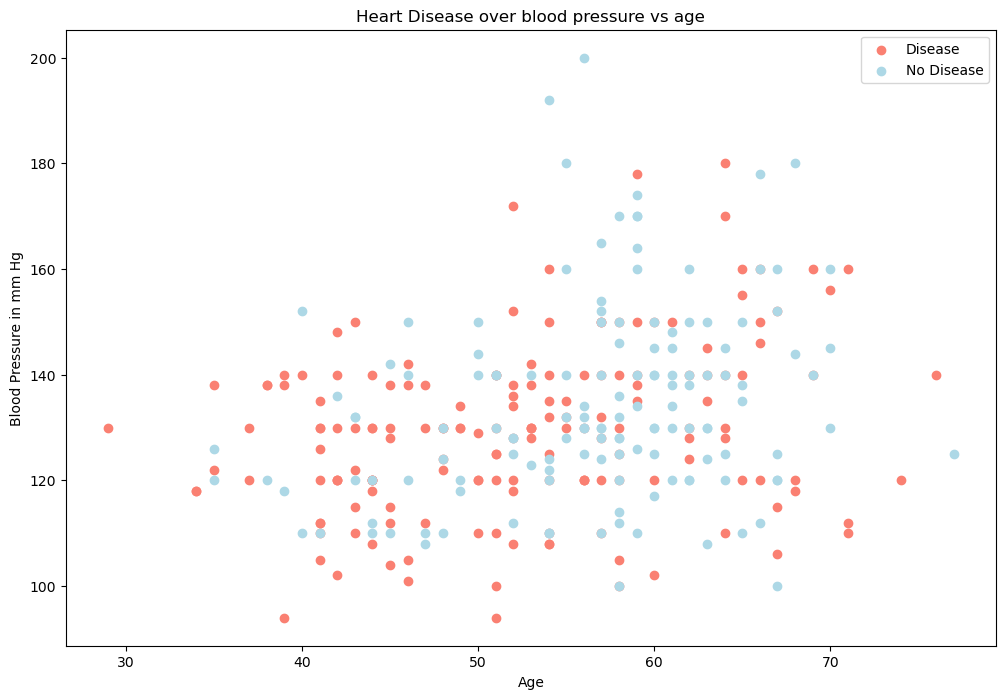

In [10]:
plt.figure(figsize=(12,8))
# With heart disease
plt.scatter(df.age[df.target==1],
            df.trestbps[df.target==1],
            c="salmon")

# Without heart disease
plt.scatter(df.age[df.target==0],
            df.trestbps[df.target==0],
            c="lightblue")

# customize
plt.title("Heart Disease over blood pressure vs age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure in mm Hg")
plt.legend(["Disease","No Disease"])

plt.show()

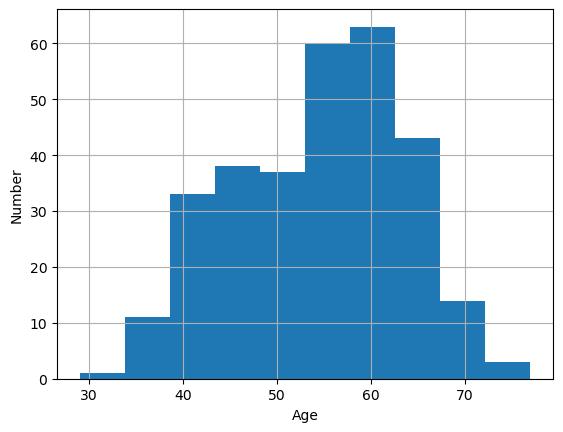

In [11]:
## Distribution of age
df.age.hist()
plt.ylabel("Number")
plt.xlabel("Age")
plt.show()

# Chest pain vs Heart Disease
Chest Pain Type (cp):
* 0: Typical angina
* 1: Atypical angina
*  2: Non-anginal pain
*   3: Asymptomatic)

In [12]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


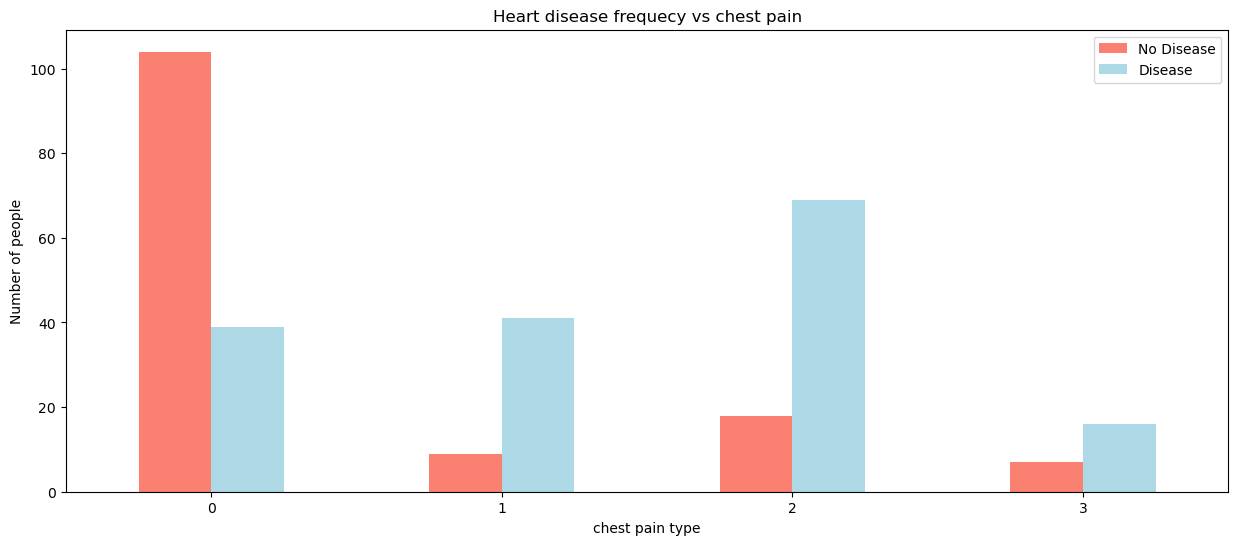

In [13]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                 figsize=(15, 6),
                                 color=["salmon", "lightblue"])
plt.title("Heart disease frequecy vs chest pain")
plt.xlabel("chest pain type")
plt.ylabel("Number of people")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

# Make a correlation metrics

In [14]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


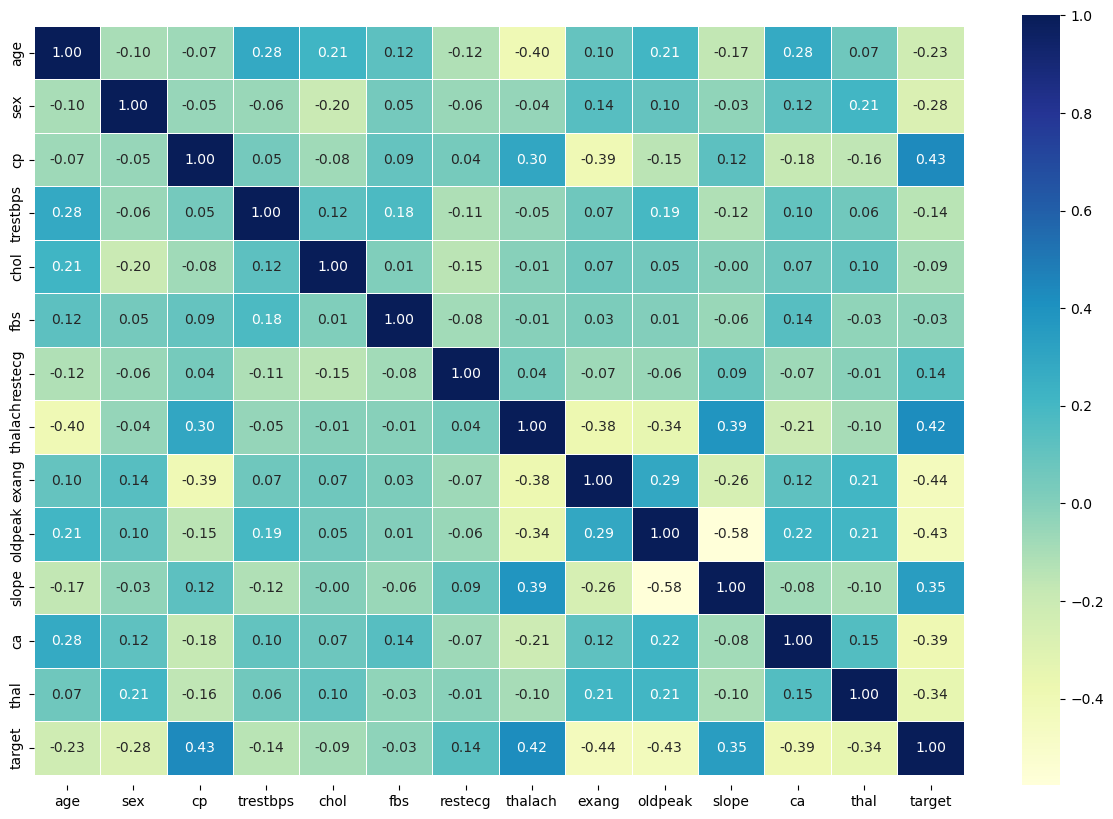

In [15]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.2, top-0.2)
plt.show()

# ML model

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# split the data
np.random.seed(42)
x = df.drop("target", axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Trying three different mode
1. Logistic regression
2. K-Nearest Neighbours Classifier
3. RnadomForestClassifier

In [18]:
# put model in dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbours Classifier": KNeighborsClassifier(),
    "RnadomForestClassifier": RandomForestClassifier()
}

# create a function to fit and score model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and Evaluate given machine learning model
    models: a dict of different sk-learn ML models
    x_train: trainind data
    x_test: testing data
    y_train: training lebels
    y_test: test labels
    """
    np.random.seed(42)
    # Make dictionary to keep model score
    model_scores = {}
    # Loops through models
    for name, model in models.items():
        # fit the model to data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [19]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train, 
                             y_test=y_test)
model_scores

/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours Classifier': 0.6885245901639344,
 'RnadomForestClassifier': 0.8360655737704918}

## Comparing models

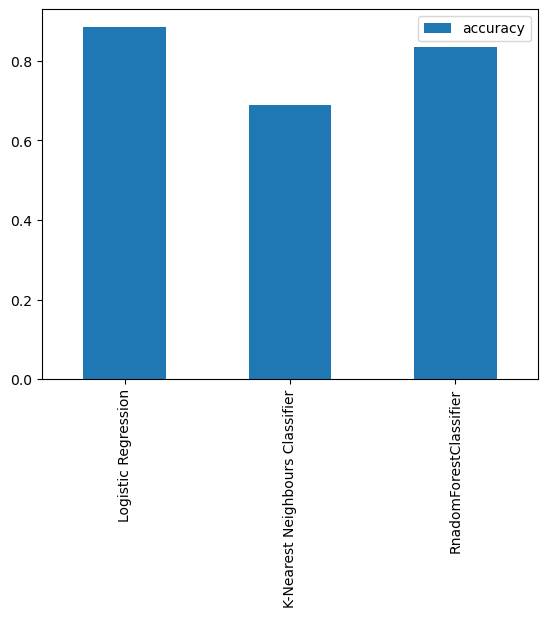

In [20]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

## Tuning KN classifier

In [21]:
train_scores = []
test_scores = []

## Different values of n_neighbors
neighbors = range(1,21)
kn_model = KNeighborsClassifier()

## trying different value of n_neighbours
for i in neighbors:
    kn_model.set_params(n_neighbors=i)
    kn_model.fit(x_train, y_train)
    train_scores.append(kn_model.score(x_train,y_train))
    test_scores.append(kn_model.score(x_test, y_test))


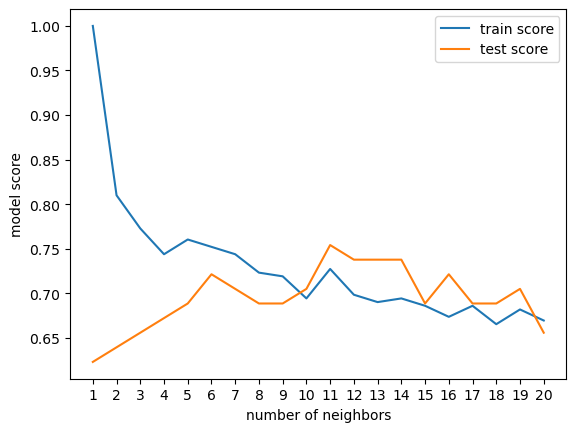


The best score of the KNN model is 75.41%


In [22]:
plt.plot(neighbors, train_scores, label="train score")
plt.plot(neighbors, test_scores, label="test score")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()
plt.xticks(range(1,21,1))
plt.show()
print(f"\nThe best score of the KNN model is {max(test_scores)*100:.2f}%")

## Tuning with RandomizedCV

In [23]:
# "Logistic Regression"
log_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear", "saga"],
    "fit_intercept": [True, False],
    "class_weight": [None, "balanced"]
}

# "RandomForestClassifier"
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [24]:
## Tuning for Logistic Regression
np.random.seed(42)
rs_log_model = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = log_grid,
    cv=5,
    n_iter=50,
    verbose=True
)
rs_log_model.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/pytho

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'solver': ['liblinear', 'saga']},
                   verbose=True)

In [25]:
rs_log_model.score(x_test, y_test)

0.8852459016393442

In [26]:
rs_log_model.best_params_

{'solver': 'liblinear',
 'fit_intercept': False,
 'class_weight': None,
 'C': np.float64(0.23357214690901212)}

In [27]:
## Tuning RandomForestClassifier
np.random.seed(42)
rs_rf_model = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = rf_grid,
    cv=5,
    n_iter=50,
    verbose=True
)
rs_rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf_model.score(x_test, y_test)

0.8688524590163934

In [29]:
rs_rf_model.best_params_

{'n_estimators': np.int64(260),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(13),
 'max_depth': 5}

# Tuning Hyperparameters using GridSearchCV

In [30]:
## Tuning for Logistic Regression
np.random.seed(42)
gs_log_model = GridSearchCV(
    LogisticRegression(),
    param_grid = log_grid,
    cv=5,
    verbose=True
)
gs_log_model.fit(x_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sumanyadav/Desktop/DataScience/ml_course/sample_project/env/lib/pytho

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'solver': ['liblinear', 'saga']},
             verbose=True)

In [31]:
gs_log_model.score(x_test, y_test)

0.8852459016393442

In [32]:
gs_log_model.best_params_

{'C': np.float64(0.23357214690901212),
 'class_weight': None,
 'fit_intercept': True,
 'solver': 'liblinear'}

In [36]:
## Tuning RandomForestClassifier

rf_grid2 = {
    "n_estimators": np.arange(10, 1000, 100),
    "max_depth": [None, 5],
    "min_samples_split": np.arange(2, 20, 9),
    "min_samples_leaf": np.arange(1, 20, 9)
}

np.random.seed(42)
gs_rf_model = GridSearchCV(
    RandomForestClassifier(),
    param_grid = rf_grid2,
    cv=5,
    verbose=True
)
gs_rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5],
                         'min_samples_leaf': array([ 1, 10, 19]),
                         'min_samples_split': array([ 2, 11]),
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
             verbose=True)

In [37]:
gs_rf_model.score(x_test, y_test)

0.8688524590163934

## Evaluating tunned models
Since LogisticRegression is performing better, sticking with it

In [89]:
## making predictions with tunned models
y_preds = gs_log_model.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [90]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

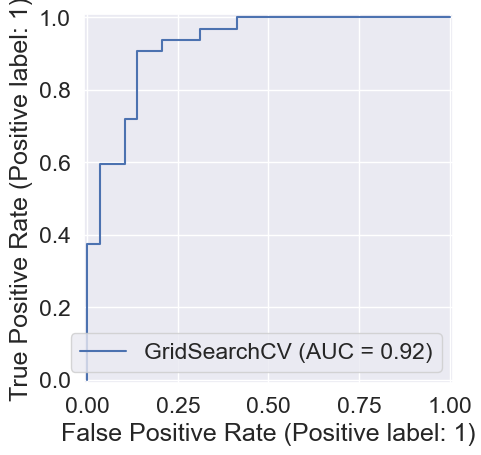

In [91]:
## plot ROC cureve and calculate AUC metrix
RocCurveDisplay.from_estimator(gs_log_model, x_test, y_test)
plt.show()

In [92]:
## confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


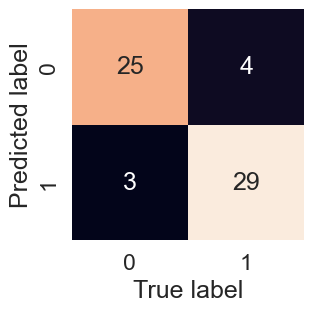

In [93]:
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test, y_preds):
    fig, ax =  plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show()

plot_conf_matrix(y_test, y_preds)

In [94]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Evaluating wusing cross-validation

In [95]:
gs_log_model.best_params_

{'C': np.float64(0.23357214690901212),
 'class_weight': None,
 'fit_intercept': True,
 'solver': 'liblinear'}

In [96]:
## creating new logistic regression model
clf = LogisticRegression(C=0.23357214690901212,
                         class_weight=None,
                         fit_intercept=True,
                         solver='liblinear')

In [97]:
## cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [98]:
## cross-validated precision
## cross-validated accuracy
cv_prc = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_prc = np.mean(cv_prc)
cv_prc

np.float64(0.8215873015873015)

In [99]:
## cross-validated f1 score
## cross-validated accuracy
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

In [100]:
## cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [101]:
# visualize cross validated metrix
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_prc,
    "Recall": cv_recall,
    "f1": cv_f1
    },
    index=[0])
cv_metrics

,Accuracy,Precision,Recall,f1
0,0.847978,0.821587,0.927273,0.87054


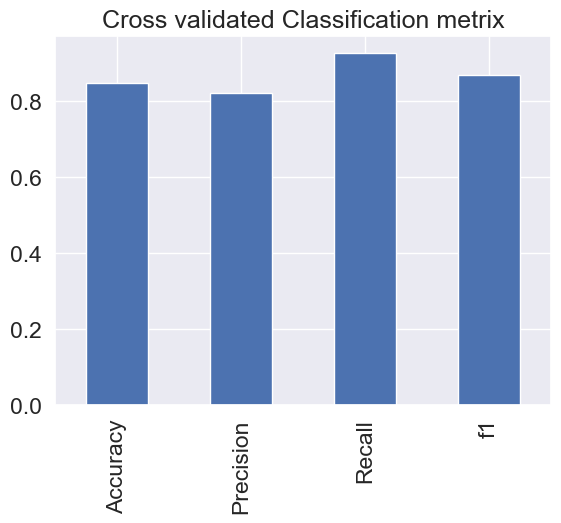

In [102]:
cv_metrics.T.plot.bar(title="Cross validated Classification metrix",
                     legend=False)
plt.show()

## Featuer importance

In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
clf = LogisticRegression(C=0.23357214690901212,
                         class_weight = None,
                         fit_intercept =True,
                         solver = 'liblinear')
clf.fit(x_train, y_train)
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590907,
         0.47095114, -0.65165351, -0.699842  ]])

In [113]:
featue_dict = dict(zip(df.columns, list(clf.coef_[0])))
featue_dict

{'age': np.float64(0.0036992183633085857),
 'sex': np.float64(-0.9042408474114028),
 'cp': np.float64(0.6747282820013463),
 'trestbps': np.float64(-0.01161340415475584),
 'chol': np.float64(-0.0017036448092066976),
 'fbs': np.float64(0.04787689082536315),
 'restecg': np.float64(0.33490184455843097),
 'thalach': np.float64(0.02472938514033986),
 'exang': np.float64(-0.6312040052639052),
 'oldpeak': np.float64(-0.5759090719885068),
 'slope': np.float64(0.4709511397091774),
 'ca': np.float64(-0.6516535119713651),
 'thal': np.float64(-0.6998419972478845)}

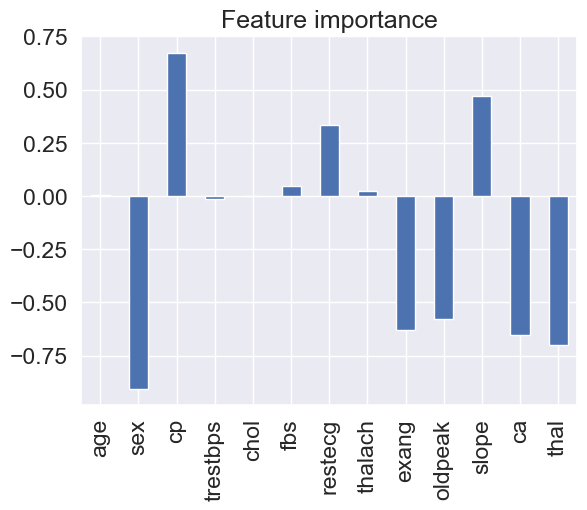

In [114]:
## visulaize feature importance
feature_df = pd.DataFrame(featue_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False)
plt.show()